In [217]:
import numpy as np
import pandas as pd 
import os
from os import listdir

There are 120 subfolders, each belonging to 1 of the 120 dog breeds. For example, images of the Chow breed are under the subfolder n02112137-chow. We then proceed to extract the name of the dog breeds by splitting the folder name.

In [218]:
folder_path='Images'
folder_dir = os.listdir(folder_path)
print(len(folder_dir),folder_dir)

121 ['n02097658-silky_terrier', 'n02092002-Scottish_deerhound', 'n02099849-Chesapeake_Bay_retriever', 'n02091244-Ibizan_hound', 'n02095314-wire-haired_fox_terrier', 'n02091831-Saluki', 'n02102318-cocker_spaniel', 'n02104365-schipperke', 'n02090622-borzoi', 'n02113023-Pembroke', 'n02105505-komondor', 'n02093256-Staffordshire_bullterrier', 'n02113799-standard_poodle', 'n02109961-Eskimo_dog', 'n02089973-English_foxhound', 'n02099601-golden_retriever', 'n02095889-Sealyham_terrier', 'n02085782-Japanese_spaniel', '.DS_Store', 'n02097047-miniature_schnauzer', 'n02110063-malamute', 'n02105162-malinois', 'n02086079-Pekinese', 'n02097130-giant_schnauzer', 'n02113978-Mexican_hairless', 'n02107142-Doberman', 'n02097209-standard_schnauzer', 'n02115913-dhole', 'n02106662-German_shepherd', 'n02106382-Bouvier_des_Flandres', 'n02110185-Siberian_husky', 'n02094258-Norwich_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02109525-Saint_Bernard', 'n02093754-Border_terrier', 'n02105251-b

I noticed that a hidden file showed here '.DS_Store'. So I checked if any of the folder names contained '.'.

In [219]:
for folder_name in folder_dir:
    if '.' in folder_name:
        folder_dir.remove(folder_name)
        
print(len(folder_dir))

120


In [220]:
breeds=[]
for i in range(len(folder_dir)):
    index=folder_dir[i].index('-')
    breed=folder_dir[i][index+1:]
    breeds.append(breed)
    print(i, breeds[i])

0 silky_terrier
1 Scottish_deerhound
2 Chesapeake_Bay_retriever
3 Ibizan_hound
4 wire-haired_fox_terrier
5 Saluki
6 cocker_spaniel
7 schipperke
8 borzoi
9 Pembroke
10 komondor
11 Staffordshire_bullterrier
12 standard_poodle
13 Eskimo_dog
14 English_foxhound
15 golden_retriever
16 Sealyham_terrier
17 Japanese_spaniel
18 miniature_schnauzer
19 malamute
20 malinois
21 Pekinese
22 giant_schnauzer
23 Mexican_hairless
24 Doberman
25 standard_schnauzer
26 dhole
27 German_shepherd
28 Bouvier_des_Flandres
29 Siberian_husky
30 Norwich_terrier
31 Irish_terrier
32 Norfolk_terrier
33 Saint_Bernard
34 Border_terrier
35 briard
36 Tibetan_mastiff
37 bull_mastiff
38 Maltese_dog
39 Kerry_blue_terrier
40 kuvasz
41 Greater_Swiss_Mountain_dog
42 Lakeland_terrier
43 Blenheim_spaniel
44 basset
45 West_Highland_white_terrier
46 Chihuahua
47 Border_collie
48 redbone
49 Irish_wolfhound
50 bluetick
51 miniature_poodle
52 Cardigan
53 EntleBucher
54 Norwegian_elkhound
55 German_short-haired_pointer
56 Bernese_moun

In [221]:
num_of_images=[]
for folder_name in folder_dir:
    directory=str(folder_path+'/'+folder_name)
    num_of_images.append(len(os.listdir(directory)))
print(len(num_of_images))

120


Creating data frame to analyse data

In [222]:
df = pd.DataFrame(list(zip(folder_dir,breeds,num_of_images)))
df.columns=['Folder_name', 'Breed', 'Amount of images']#, 'Numer_of_images']
df.head()

Folder_name                     Breed  \
0             n02097658-silky_terrier             silky_terrier   
1        n02092002-Scottish_deerhound        Scottish_deerhound   
2  n02099849-Chesapeake_Bay_retriever  Chesapeake_Bay_retriever   
3              n02091244-Ibizan_hound              Ibizan_hound   
4   n02095314-wire-haired_fox_terrier   wire-haired_fox_terrier   

   Amount of images  
0               183  
1               232  
2               167  
3               188  
4               157

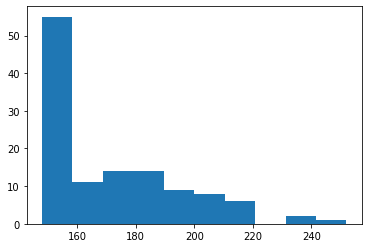

In [223]:
plt.hist(df['Amount of images'], histtype='barstacked')
plt.show()

In [224]:
df.describe()

Amount of images
count        120.000000
mean         171.500000
std           23.220898
min          148.000000
25%          152.750000
50%          159.500000
75%          186.250000
max          252.000000

Data frame dla adresów obrazków i labeli

In [225]:
labeled_images = []

for folder_name in df['Folder_name']:
    index=folder_name.index('-')
    breed=folder_name[index+1:]
    directory=str(folder_path+'/'+folder_name)
    for image in os.listdir(directory):
        labeled_images.append([directory+'/'+image, breed])

In [226]:
labeled_images_df = pd.DataFrame(labeled_images)
labeled_images_df.columns=['Directory', 'Breed']
labeled_images_df

Directory  \
0        Images/n02097658-silky_terrier/n02097658_26.jpg   
1      Images/n02097658-silky_terrier/n02097658_4869.jpg   
2       Images/n02097658-silky_terrier/n02097658_595.jpg   
3      Images/n02097658-silky_terrier/n02097658_9222.jpg   
4       Images/n02097658-silky_terrier/n02097658_422.jpg   
...                                                  ...   
20575  Images/n02089078-black-and-tan_coonhound/n0208...   
20576  Images/n02089078-black-and-tan_coonhound/n0208...   
20577  Images/n02089078-black-and-tan_coonhound/n0208...   
20578  Images/n02089078-black-and-tan_coonhound/n0208...   
20579  Images/n02089078-black-and-tan_coonhound/n0208...   

                         Breed  
0                silky_terrier  
1                silky_terrier  
2                silky_terrier  
3                silky_terrier  
4                silky_terrier  
...                        ...  
20575  black-and-tan_coonhound  
20576  black-and-tan_coonhound  
20577  black-and-tan_coonhound  
20578  black-and-tan_coonhound  
20579  black-and-tan_coonhound  

[20580 rows x 2 columns]

In [227]:
60,20,20

(60, 20, 20)

In [228]:
train, validate, test = np.split(labeled_images_df.sample(frac=1, random_state=42), [int(.6*len(labeled_images_df)), int(.8*len(labeled_images_df))])

In [229]:
train

Directory                Breed
16226     Images/n02088466-bloodhound/n02088466_6789.jpg           bloodhound
3388         Images/n02110063-malamute/n02110063_210.jpg             malamute
20011  Images/n02094433-Yorkshire_terrier/n02094433_3...    Yorkshire_terrier
1427      Images/n02104365-schipperke/n02104365_3963.jpg           schipperke
19697     Images/n02112018-Pomeranian/n02112018_5165.jpg           Pomeranian
...                                                  ...                  ...
19452  Images/n02102973-Irish_water_spaniel/n02102973...  Irish_water_spaniel
10702         Images/n02105412-kelpie/n02105412_7264.jpg               kelpie
13534  Images/n02099712-Labrador_retriever/n02099712_...   Labrador_retriever
10465         Images/n02100583-vizsla/n02100583_5829.jpg               vizsla
2860   Images/n02095889-Sealyham_terrier/n02095889_78...     Sealyham_terrier

[12348 rows x 2 columns]

In [230]:
validate

Directory                Breed
1221   Images/n02102318-cocker_spaniel/n02102318_6612...       cocker_spaniel
15351          Images/n02098413-Lhasa/n02098413_8771.jpg                Lhasa
4864   Images/n02110185-Siberian_husky/n02110185_1312...       Siberian_husky
13963          Images/n02096177-cairn/n02096177_4825.jpg                cairn
14102    Images/n02106550-Rottweiler/n02106550_11444.jpg           Rottweiler
...                                                  ...                  ...
19474  Images/n02102973-Irish_water_spaniel/n02102973...  Irish_water_spaniel
17962  Images/n02102040-English_springer/n02102040_97...     English_springer
12225      Images/n02086240-Shih-Tzu/n02086240_12480.jpg             Shih-Tzu
1051         Images/n02091831-Saluki/n02091831_10576.jpg               Saluki
14519  Images/n02105855-Shetland_sheepdog/n02105855_4...    Shetland_sheepdog

[4116 rows x 2 columns]

In [231]:
test

Directory  \
11410          Images/n02112137-chow/n02112137_15792.jpg   
9221   Images/n02091467-Norwegian_elkhound/n02091467_...   
10234  Images/n02101006-Gordon_setter/n02101006_2414.jpg   
4763   Images/n02106382-Bouvier_des_Flandres/n0210638...   
9062      Images/n02108000-EntleBucher/n02108000_352.jpg   
...                                                  ...   
11284           Images/n02112137-chow/n02112137_9074.jpg   
11964  Images/n02097298-Scotch_terrier/n02097298_3301...   
5390   Images/n02094114-Norfolk_terrier/n02094114_252...   
860    Images/n02095314-wire-haired_fox_terrier/n0209...   
15795    Images/n02109047-Great_Dane/n02109047_31274.jpg   

                         Breed  
11410                     chow  
9221        Norwegian_elkhound  
10234            Gordon_setter  
4763      Bouvier_des_Flandres  
9062               EntleBucher  
...                        ...  
11284                     chow  
11964           Scotch_terrier  
5390           Norfolk_terrier  
860    wire-haired_fox_terrier  
15795               Great_Dane  

[4116 rows x 2 columns]

In [232]:
train.to_csv(r'train.csv', index = False)
validate.to_csv(r'validate.csv', index = False)
test.to_csv(r'test.csv', index = False)
labeled_images_df.to_csv(r'labeled_images.csv', index = False)

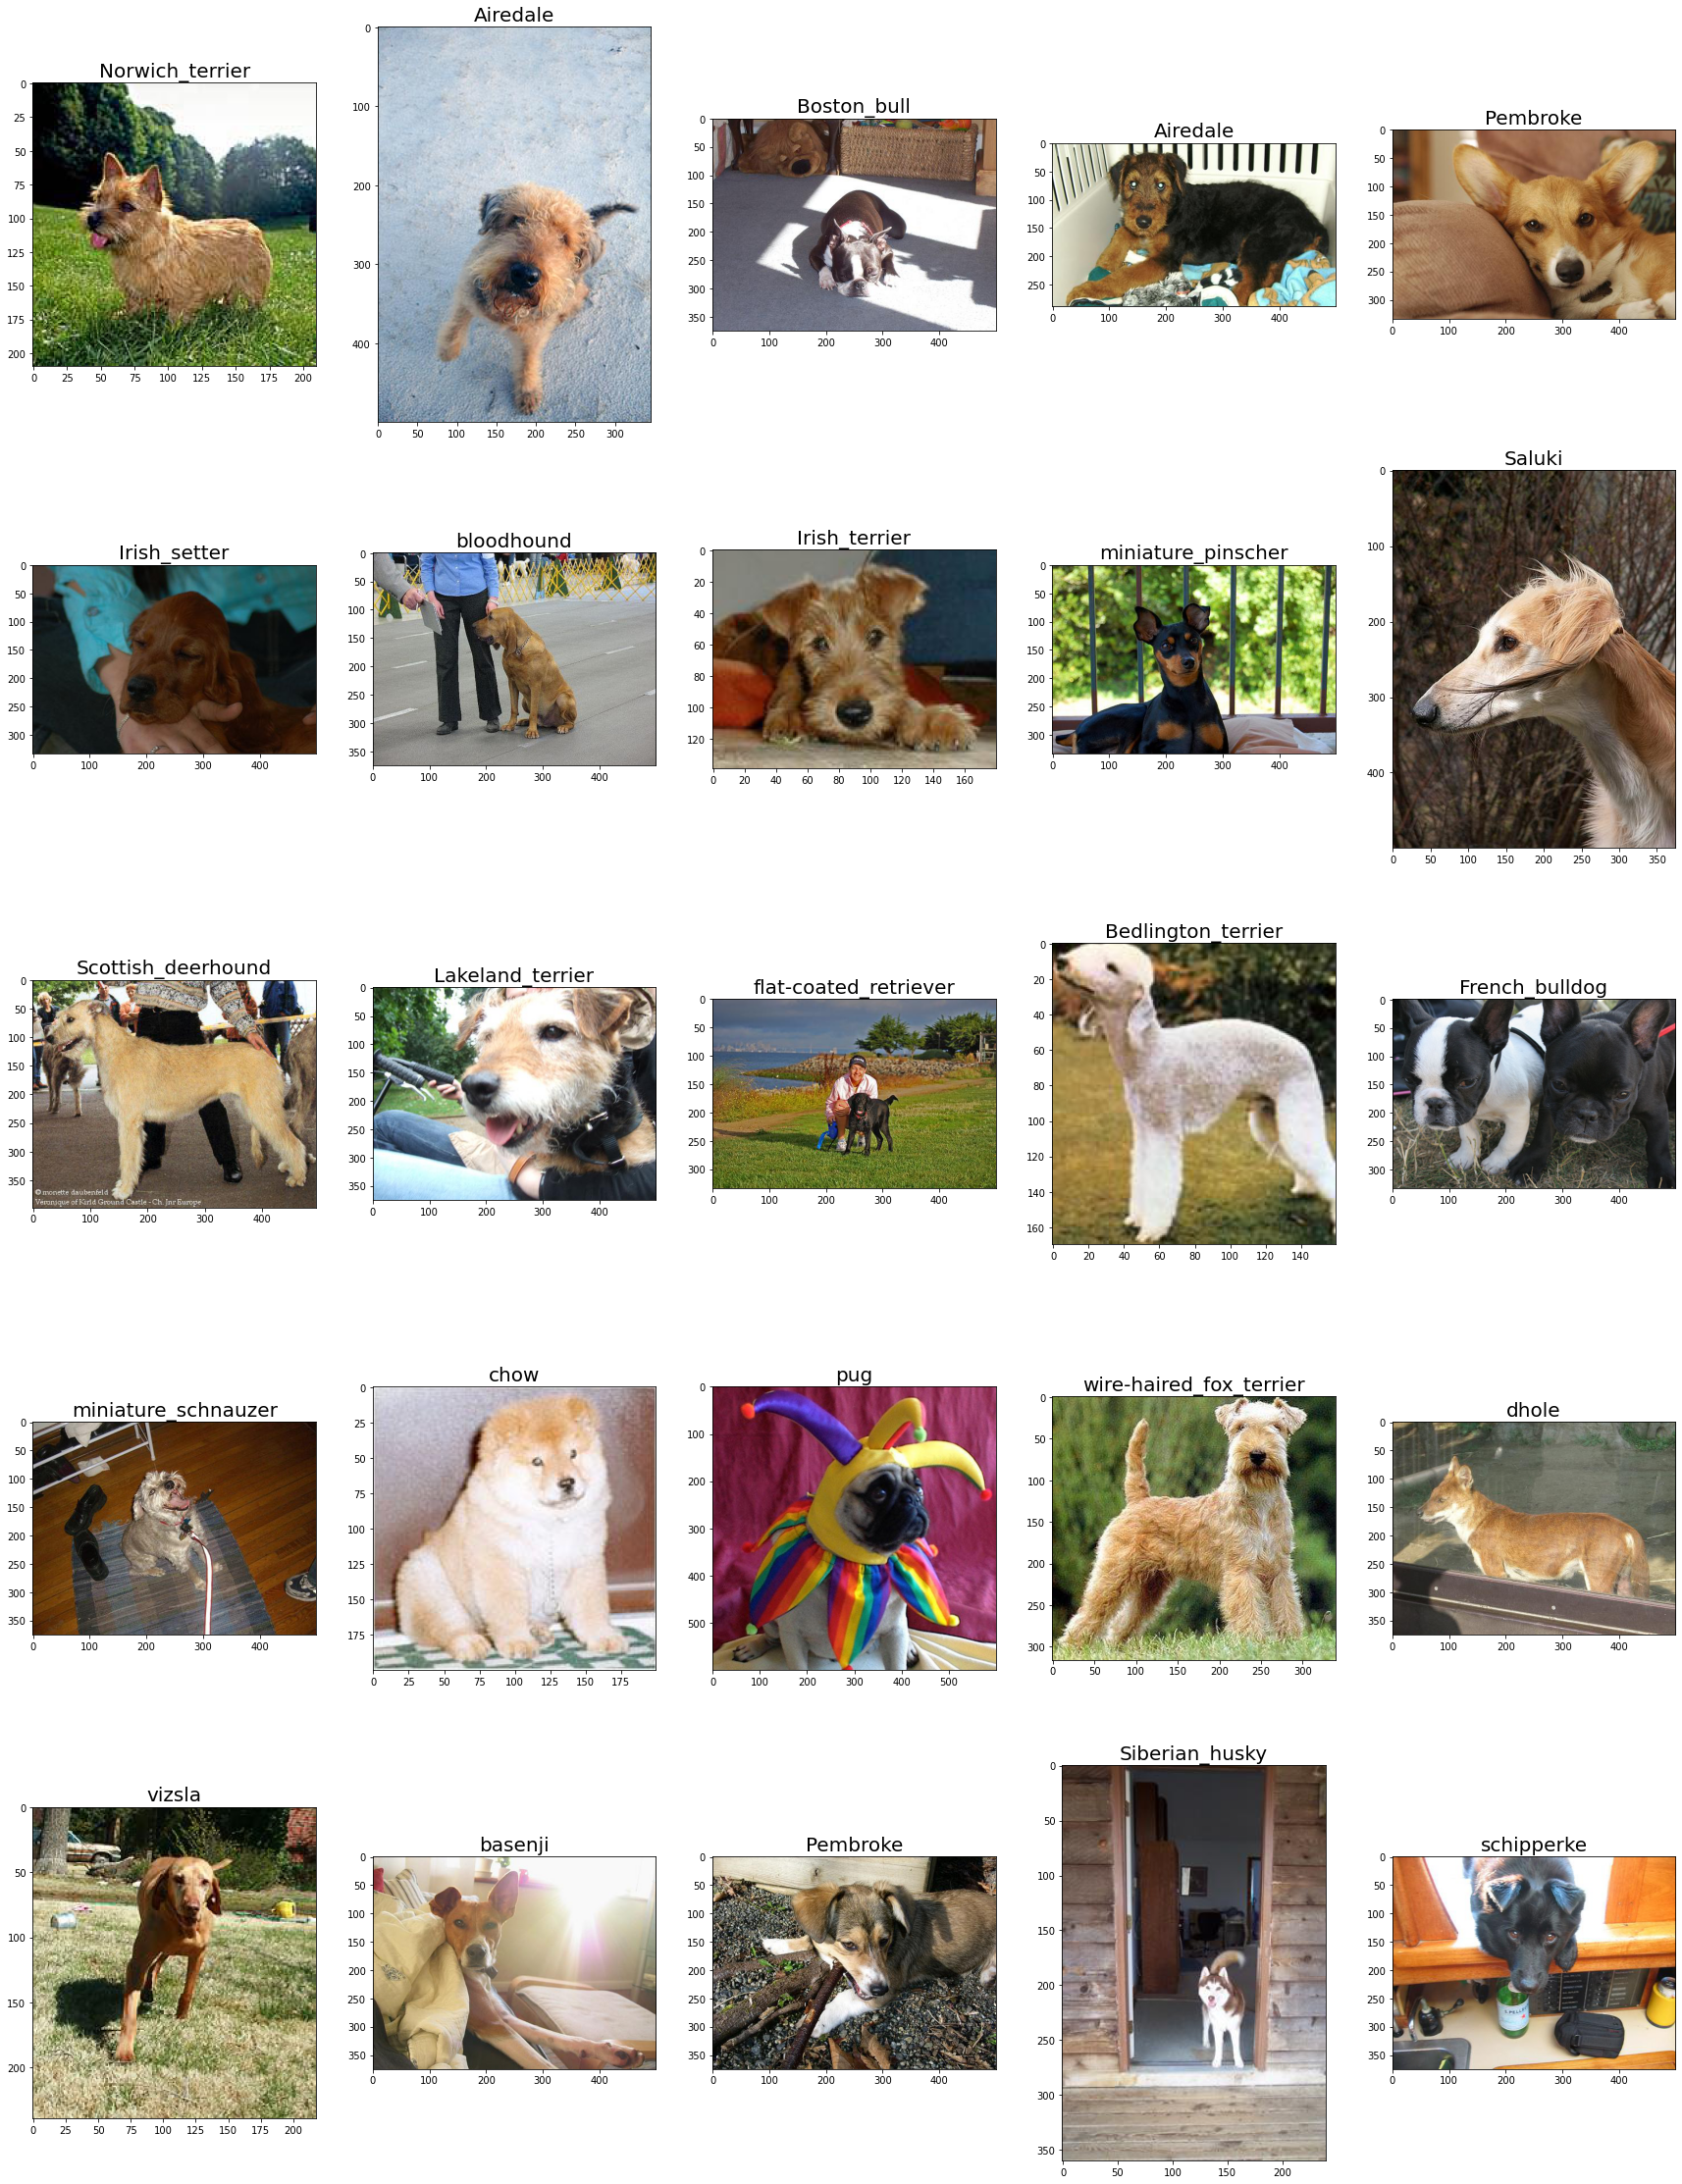

In [233]:
plt.figure(figsize=(30,40))
for i, image in enumerate(random.sample(range(0, len(labeled_images_df)), 25)): # random 25 images
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=0.1)
    directory=labeled_images_df.loc[image][0]
    file = imread(directory)
    breed=labeled_images_df.loc[image][1]
    plt.imshow(file)
    plt.title(breed, fontsize=20)
plt.show()